2948 215.70963364993216


Text(0.5, 0, 'Latency (us)')

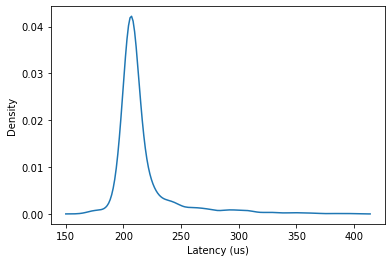

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

latency = np.loadtxt('../topic_test/latency_dist.txt')
latency = np.extract(latency<400, latency)

print(latency.shape[0], np.average(latency))
sns.distplot(latency, hist=False)
plt.xlabel('Latency (us)')

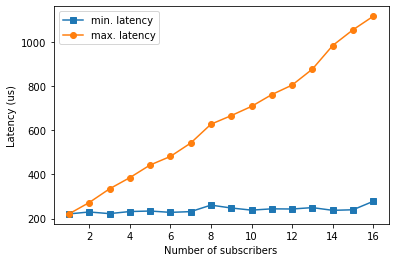

In [33]:
import numpy as np
import matplotlib.pyplot as plot

lat = np.loadtxt('../topic_test/latency.txt')
n = np.arange(1, 17)

plt.plot(n, lat[:,0], marker='s')
plt.plot(n, lat[:,1], marker='o')
plt.xlabel('Number of subscribers')
plt.ylabel('Latency (us)')
plt.legend(['min. latency', 'max. latency'])
plt.show()

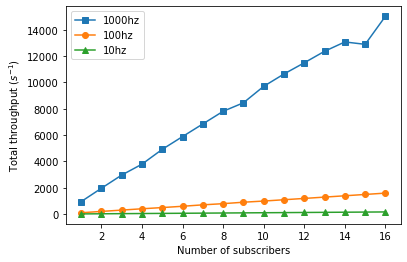

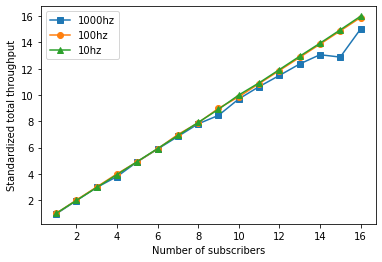

In [32]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.loadtxt('../topic_test/throughput_1ms.txt') / 60
t10 = np.loadtxt('../topic_test/throughput_10ms.txt') / 60
t100 = np.loadtxt('../topic_test/throughput_100ms.txt') / 60
n = np.arange(1, 17)

plt.plot(n, t1, marker='s')
plt.plot(n, t10, marker='o')
plt.plot(n, t100, marker='^')
plt.xlabel('Number of subscribers')
plt.ylabel('Total throughput ($s^{-1}$)')
plt.legend(['1000hz', '100hz', '10hz'])
plt.show()

t1 = t1 / 1000
t10 = t10 / 100
t100 = t100 / 10

plt.plot(n, t1, marker='s')
plt.plot(n, t10, marker='o')
plt.plot(n, t100, marker='^')
plt.xlabel('Number of subscribers')
plt.ylabel('Standardized total throughput')
plt.legend(['1000hz', '100hz', '10hz'])
plt.show()

9905 284.115598182736


Text(0.5, 0, 'Latency (us)')

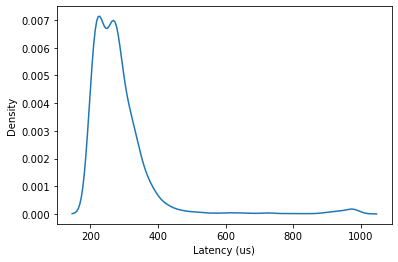

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rtt = np.loadtxt('../service_test/rtt_dist.txt')
rtt = np.extract(rtt<1000, rtt)

print(rtt.shape[0], np.average(rtt))
sns.distplot(rtt, hist=False)
plt.xlabel('Latency (us)')

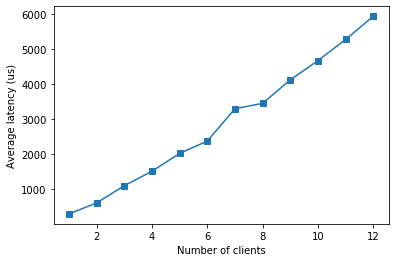

In [31]:
import numpy as np
import matplotlib.pyplot as plt

rtt = np.loadtxt('../service_test/rtt.txt')
n = np.arange(1, rtt.shape[0]+1)

plt.plot(n, rtt, marker='s')
plt.xlabel('Number of clients')
plt.ylabel('Average latency (us)')
plt.show()

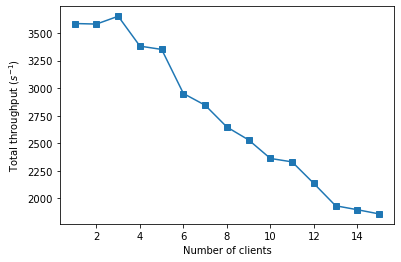

In [34]:
import numpy as np
import matplotlib.pyplot as plt

throughput = np.loadtxt('../service_test/throughput.txt')
n = np.arange(1, throughput.shape[0]+1)

plt.plot(n, throughput, marker='s')
plt.xlabel('Number of clients')
plt.ylabel('Total throughput ($s^{-1}$)')
plt.show()